### Lab-6 : Self-Practice

In this week self practice, you will apply [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on multi-class problem. In the following 3-class generated blobs you will train SVCs in a one-vs-one and one-vs-rest approach. Draw the decision bounderies of each approach.

#### Question: Recall what the difference between one-vs-one and on-vs-rest for multiclass classification is. 

In [10]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier


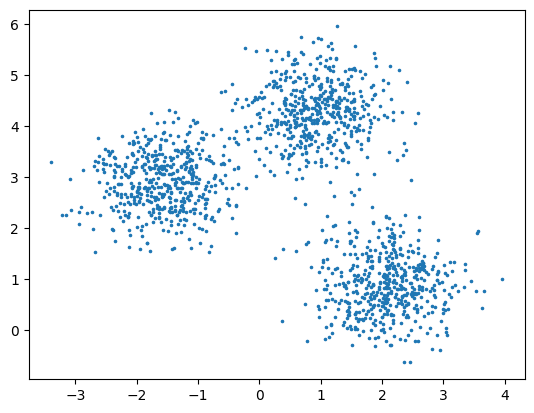

In [27]:
# we create the dataset
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, cluster_std=0.60,
                  random_state=0)
plt.scatter(X[:, 0], X[:, 1],  marker=".", s=10)

In [12]:
from sklearn.svm import SVC
import numpy as np

def plot_svc_decision_function(model:SVC, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    print(xlim)
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])


    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# plot_svc_decision_function(model)

### Create a svc model to classify the data point using one-vs-one approach and draw the desicion bounderies (hyperplan and margins)

(-4.0, 5.0)


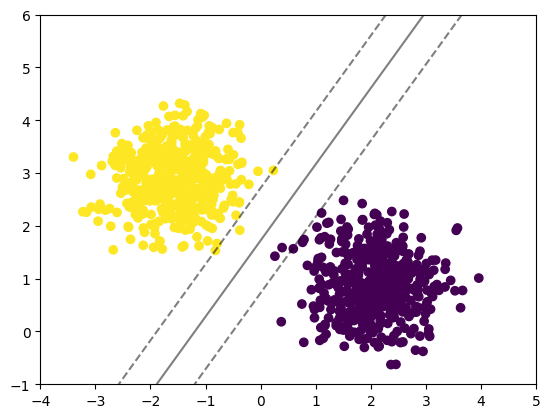

(-4.0, 5.0)


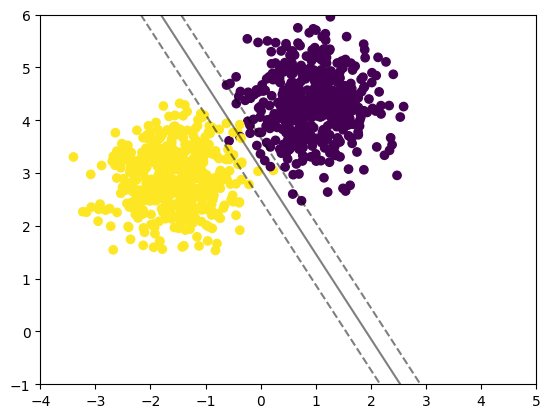

(-4.0, 5.0)


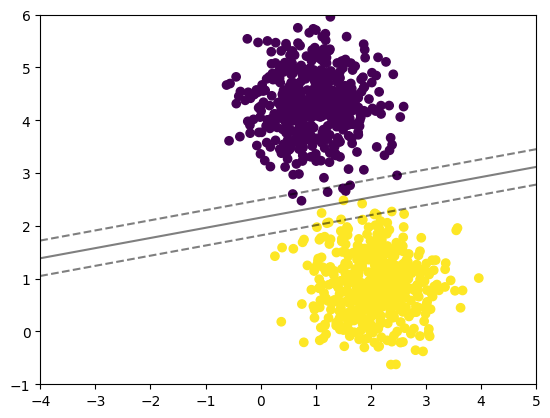

In [32]:
# Your code here

svc = SVC(kernel='linear')

classes = [0, 1, 2]
for c in classes:
    _X = X[y != c]
    _Y = y[y != c]
    svc.fit(_X, _Y)
    ax = plt.gca()
    ax.scatter(_X[:, 0], _X[:, 1], c=_Y)
    ax.set_xlim(-4, 5)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(svc, ax)
    plt.show()

### Create a svc model to classify the data points using one-vs-rest approach and draw the desicion bounderies

[0 1 1 ... 1 1 0]
(-4.0, 5.0)


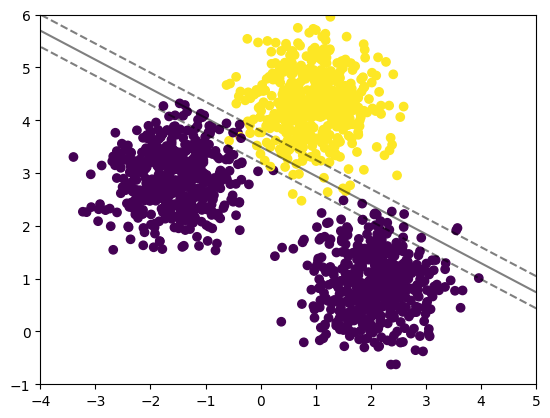

[0 0 0 ... 0 0 0]
(-4.0, 5.0)


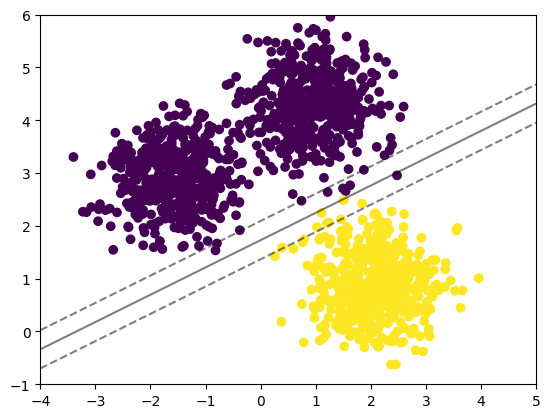

[1 0 0 ... 0 0 1]
(-4.0, 5.0)


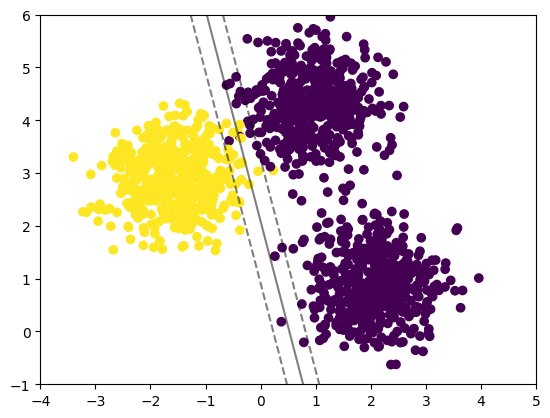

In [34]:
# Your code here
from sklearn.svm import SVC

svc = SVC(kernel='linear')

classes = [0, 1, 2]
for c in classes:
    new_y = np.vectorize(lambda y: (1 if y == c else 0))(y)
    print(new_y)
    _X = X
    _Y = new_y
    svc.fit(_X, _Y)
    ax = plt.gca()
    ax.scatter(_X[:, 0], _X[:, 1], c=_Y)
    ax.set_xlim(-4, 5)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(svc, ax)
    plt.show()

### Using 5-fold cross validation compare the accuracies of each method

In [35]:
# Your code here
from sklearn import metrics
from sklearn.model_selection import cross_val_score


svc = SVC(kernel='linear')
ovo = OneVsOneClassifier(svc)
ovr = OneVsRestClassifier(svc)
print(cross_val_score(ovo, X, y, scoring='accuracy'))
print(cross_val_score(ovr, X, y, scoring='accuracy'))

[0.99       0.99666667 1.         1.         1.        ]
[0.99       0.99333333 1.         0.99666667 1.        ]
